In [1]:
%run "Pycode/data_preparation.py"
%run "Pycode/data_analysis.py"

In [2]:
# Load the cleaned dataset and column names
master_data, dataCol = data_prep(minTF=10, cap=20)

In [3]:
# Set validation split and seed
validation_split = 0.2
seed = 314

# Split data into test set and training set
trainData, testData = train_test_split(master_data, validation_split, seed)
dataFold = define_fold(trainData)

## Resampling Techniques Comparison

In [5]:
# Compare result from different resampling techniques
sampling_result = compare_sampling('random_forest', trainData, testData, dataCol)
sampling_result

,roc_auc,test_accuracy,test_f1,test_precision,test_recall,train_accuracy,train_f1,train_precision,train_recall
None,0.512441,0.866450,0.063927,0.333333,0.035354,0.984097,0.939467,1.000000,0.885845
Rus,0.505239,0.865147,0.037209,0.235294,0.020202,0.979803,0.921846,1.000000,0.855023
Ros,0.517584,0.871661,0.075117,0.533333,0.040404,0.981870,0.930488,0.998691,0.871005
Smote,0.506924,0.860586,0.053097,0.214286,0.030303,0.984097,0.939614,0.997436,0.888128
Balanced,0.518521,0.865798,0.088496,0.357143,0.050505,0.981234,0.927873,0.998684,0.866438


## Support Vector Machine

In [6]:
# Set up parameter values
linearSVC_grid = {
    'kernel': ['linear'],
    'C': [0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5],
    'class_weight': ['balanced'],
    'probability': [True]
}

linearSVC_param = list(ParameterGrid(linearSVC_grid))
len(linearSVC_param)

8

In [7]:
%%time
# Fit the model
linearSVC_result = model_cv('support_vector_machine', linearSVC_param, trainData, dataFold, dataCol)

Wall time: 1h 45min 50s


In [8]:
# Look at the result
linearSVC_result.sort_values('roc_auc', ascending=False).head()

,C,class_weight,kernel,probability,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1,roc_auc
1,0.010,balanced,linear,True,0.705667,0.653691,0.289929,0.230578,0.767504,0.638003,0.420695,0.337024,0.647606
0,0.001,balanced,linear,True,0.618102,0.600029,0.232180,0.214172,0.754646,0.704320,0.355003,0.326871,0.644351
2,0.050,balanced,linear,True,0.755526,0.673007,0.343931,0.234237,0.830978,0.596105,0.486308,0.334868,0.641117
3,0.100,balanced,linear,True,0.771034,0.680904,0.363269,0.231839,0.854101,0.562830,0.509527,0.327167,0.631776
4,0.200,balanced,linear,True,0.788372,0.678041,0.385557,0.219307,0.874243,0.518158,0.534958,0.306788,0.611537


In [9]:
# Extract the best model
linearSVC_best_index = linearSVC_result.sort_values('roc_auc', ascending=False)[:1].index[0]
linearSVC_best_param = linearSVC_param[linearSVC_best_index]

In [10]:
linearSVC_best_param

{'C': 0.01,
 'class_weight': 'balanced',
 'kernel': 'linear',
 'probability': True}

In [11]:
# Set up parameter values
nonlinearSVC_grid = {
    'kernel':['rbf'],
    'C':[0.1, 1, 10, 100],
    'gamma':[0.001, 0.01, 0.1, 0.5],
    'class_weight':['balanced'],
    'probability':[True]
}

nonlinearSVC_param = list(ParameterGrid(nonlinearSVC_grid))
len(nonlinearSVC_param)

16

In [12]:
%%time
# Set up parameter values
nonlinearSVC_result = model_cv('support_vector_machine', nonlinearSVC_param, trainData, dataFold, dataCol)

Wall time: 4h 13min


In [13]:
# Look at the result
nonlinearSVC_result.sort_values('roc_auc', ascending=False).head()

,C,class_weight,gamma,kernel,probability,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1,roc_auc
1,0.1,balanced,0.010,rbf,True,0.655046,0.630687,0.250667,0.225837,0.741979,0.683199,0.374627,0.337650,0.653349
4,1.0,balanced,0.001,rbf,True,0.654971,0.630036,0.250372,0.224951,0.740846,0.680117,0.374196,0.336190,0.651727
5,1.0,balanced,0.010,rbf,True,0.745282,0.679132,0.330773,0.240530,0.809395,0.606773,0.469485,0.342960,0.649193
8,10.0,balanced,0.001,rbf,True,0.731040,0.668041,0.316522,0.234822,0.802666,0.616280,0.453846,0.338706,0.646724
2,0.1,balanced,0.100,rbf,True,0.804884,0.733155,0.399344,0.258227,0.782051,0.485290,0.527640,0.335776,0.629106


In [14]:
# Extract the best model
nonlinearSVC_best_index = nonlinearSVC_result.sort_values('roc_auc', ascending=False)[:1].index[0]
nonlinearSVC_best_param = nonlinearSVC_param[nonlinearSVC_best_index]

In [15]:
nonlinearSVC_best_param

{'C': 0.1,
 'class_weight': 'balanced',
 'gamma': 0.01,
 'kernel': 'rbf',
 'probability': True}

## Naive Bayes

In [16]:
# Set up parameter values
gaussianNB_grid = {
    'var_smoothing': np.arange(0,0.151,0.001)
}

gaussianNB_param = list(ParameterGrid(gaussianNB_grid))
len(gaussianNB_param)

151

In [17]:
%%time
# Set up parameter values
gaussianNB_result = model_cv('gaussian_naive_bayes', gaussianNB_param, trainData, dataFold, dataCol)

Wall time: 13min 57s


In [18]:
# Look at the result
gaussianNB_result.sort_values('roc_auc', ascending=False).head()

,var_smoothing,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1,roc_auc
148,0.148,0.456687,0.416413,0.194555,0.169617,0.922599,0.81141,0.321253,0.279308,0.582522
150,0.150,0.456608,0.416254,0.194536,0.169589,0.922599,0.81141,0.321226,0.279266,0.582433
149,0.149,0.456647,0.416254,0.194546,0.169589,0.922599,0.81141,0.321240,0.279266,0.582433
147,0.147,0.456726,0.416095,0.194642,0.169526,0.923167,0.81141,0.321406,0.279186,0.582337
137,0.137,0.456447,0.416095,0.194515,0.169410,0.922881,0.81141,0.321217,0.279073,0.582311


In [19]:
# Extract the best model
gaussianNB_best_index = gaussianNB_result.sort_values('roc_auc', ascending=False)[:1].index[0]
gaussianNB_best_param = gaussianNB_param[gaussianNB_best_index]

In [20]:
gaussianNB_best_param

{'var_smoothing': 0.148}

In [21]:
# Set up parameter values
complementNB_grid = {
    'alpha': np.arange(0.001, 0.5, 0.005), 
    'norm':[False, True]
}

complementNB_param = list(ParameterGrid(complementNB_grid))
len(complementNB_param)

200

In [22]:
%%time
# Set up parameter values
complementNB_result = model_cv('complement_naive_bayes', complementNB_param, trainData, dataFold, dataCol)

Wall time: 13min 46s


In [23]:
# Look at the result
complementNB_result.sort_values('roc_auc', ascending=False).head()

,alpha,norm,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1,roc_auc
170,0.426,False,0.696446,0.620829,0.291082,0.212778,0.819675,0.635942,0.429349,0.317361,0.627339
172,0.431,False,0.696525,0.620501,0.291093,0.212675,0.819372,0.635942,0.429324,0.317228,0.627153
198,0.496,False,0.697321,0.618903,0.291296,0.212216,0.816760,0.636213,0.429194,0.316767,0.626278
176,0.441,False,0.696524,0.619719,0.291097,0.211980,0.819352,0.634493,0.429326,0.316319,0.626058
174,0.436,False,0.696525,0.620026,0.291048,0.211976,0.819070,0.633376,0.429237,0.316142,0.625780


In [24]:
# Extract the best model
complementNB_best_index = complementNB_result.sort_values('roc_auc', ascending=False)[:1].index[0]
complementNB_best_param = complementNB_param[complementNB_best_index]

In [25]:
complementNB_best_param

{'alpha': 0.426, 'norm': False}

## Logistic Regression

In [26]:
# Set up parameter values
lasso_grid = {
    'penalty': ['l1'],
    'C': np.arange(0.01,1.02,0.05),
    'class_weight': ['balanced'],
    'solver': ['liblinear','saga']
}

lasso_param = list(ParameterGrid(lasso_grid))
len(lasso_param)

42

In [27]:
%%time
# Set up parameter values
lasso_result = model_cv('logistic_regression', lasso_param, trainData, dataFold, dataCol)

Wall time: 16min 56s


In [28]:
# Look at the result
lasso_result.sort_values('roc_auc', ascending=False).head()

,C,class_weight,penalty,solver,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1,roc_auc
8,0.21,balanced,l1,liblinear,0.733832,0.674683,0.313120,0.239119,0.763248,0.615258,0.443950,0.342589,0.650318
7,0.16,balanced,l1,saga,0.714423,0.667395,0.293838,0.235593,0.748552,0.623655,0.421947,0.340036,0.649770
5,0.11,balanced,l1,saga,0.692512,0.661160,0.273738,0.233649,0.730337,0.632308,0.398124,0.339228,0.649763
6,0.16,balanced,l1,liblinear,0.715903,0.669490,0.294630,0.236553,0.745838,0.620424,0.422319,0.340549,0.649560
4,0.11,balanced,l1,liblinear,0.693192,0.660402,0.274040,0.232919,0.729107,0.630099,0.398259,0.338031,0.648413


In [29]:
# Extract the best model
lasso_best_index = lasso_result.sort_values('roc_auc', ascending=False)[:1].index[0]
lasso_best_param = lasso_param[lasso_best_index]

In [30]:
lasso_best_param

{'C': 0.21000000000000002,
 'class_weight': 'balanced',
 'penalty': 'l1',
 'solver': 'liblinear'}

In [31]:
# Set up parameter values
ridge_grid = {
    'penalty': ['l2'],
    'C': np.arange(0.01,1.02,0.05),
    'class_weight': ['balanced'],
    'solver': ['lbfgs', 'liblinear', 'saga']
}

ridge_param = list(ParameterGrid(ridge_grid))
len(ridge_param)

63

In [32]:
%%time
# Set up parameter values
ridge_result = model_cv('logistic_regression', ridge_param, trainData, dataFold, dataCol)

Wall time: 14min 48s


In [33]:
# Look at the result
ridge_result.sort_values('roc_auc', ascending=False).head()

,C,class_weight,penalty,solver,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1,roc_auc
0,0.01,balanced,l2,lbfgs,0.708527,0.667056,0.288122,0.237078,0.742771,0.628135,0.415062,0.342124,0.651389
2,0.01,balanced,l2,saga,0.708447,0.667056,0.288059,0.237078,0.742771,0.628135,0.414996,0.342124,0.651389
1,0.01,balanced,l2,liblinear,0.705859,0.663713,0.286363,0.235104,0.745025,0.629340,0.413588,0.340264,0.649954
4,0.06,balanced,l2,liblinear,0.757561,0.684870,0.341331,0.241402,0.796488,0.591684,0.477757,0.341286,0.646173
5,0.06,balanced,l2,saga,0.757680,0.685801,0.341376,0.241461,0.795915,0.588000,0.477701,0.340652,0.645162


In [34]:
# Extract the best model
ridge_best_index = ridge_result.sort_values('roc_auc', ascending=False)[:1].index[0]
ridge_best_param = ridge_param[ridge_best_index]

In [35]:
ridge_best_param

{'C': 0.01, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}

In [36]:
# Set up parameter values
elasticnet_grid = {
    'alpha': [0.01, 0.05, 0.1, 0.5, 1, 10, 20, 100],
    'l1_ratio': [0, 0.2, 0.4, 0.6, 0.8, 1],
    'loss': ['log'],
    'penalty': ['elasticnet'],
    'tol': [0.01],
    'max_iter': [100],
    'class_weight': ['balanced'],
}

elasticnet_param = list(ParameterGrid(elasticnet_grid))
len(elasticnet_param)

48

In [37]:
%%time
# Set up parameter values
elasticnet_result = model_cv('elasticnet', elasticnet_param, trainData, dataFold, dataCol)

Wall time: 4min 6s


In [38]:
# Look at the result
elasticnet_result.sort_values('roc_auc', ascending=False).head()

,alpha,class_weight,l1_ratio,loss,max_iter,penalty,tol,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1,roc_auc
6,0.05,balanced,0.0,log,100,elasticnet,0.01,0.681323,0.649309,0.265494,0.230245,0.727427,0.648534,0.388845,0.336934,0.649987
12,0.10,balanced,0.0,log,100,elasticnet,0.01,0.669293,0.642558,0.255307,0.226520,0.714085,0.648997,0.375798,0.332924,0.646262
3,0.01,balanced,0.6,log,100,elasticnet,0.01,0.624612,0.615584,0.228315,0.217604,0.707424,0.680477,0.344649,0.328462,0.642822
1,0.01,balanced,0.2,log,100,elasticnet,0.01,0.659937,0.638224,0.249792,0.223861,0.717424,0.647163,0.370238,0.330744,0.642476
0,0.01,balanced,0.0,log,100,elasticnet,0.01,0.734748,0.679193,0.315054,0.237987,0.739312,0.587922,0.439106,0.335371,0.641664


In [39]:
# Extract the best model
elasticnet_best_index = elasticnet_result.sort_values('roc_auc', ascending=False)[:1].index[0]
elasticnet_best_param = elasticnet_param[elasticnet_best_index]

In [40]:
elasticnet_best_param

{'alpha': 0.05,
 'class_weight': 'balanced',
 'l1_ratio': 0,
 'loss': 'log',
 'max_iter': 100,
 'penalty': 'elasticnet',
 'tol': 0.01}

## Random Forest

In [41]:
# Set up parameter values
rf_grid = {
    'max_depth': [5, 10, 15, 20],
    'max_features': [None, 'sqrt', 'log2'],
    'n_estimators': [10, 20],
    'class_weight': ['balanced'],
    'criterion':['gini','entropy'],
    'bootstrap':[True, False],
    'n_jobs':[-1]
}

rf_param = list(ParameterGrid(rf_grid))
len(rf_param)

96

In [42]:
%%time
# Set up parameter values
rf_result = model_cv('random_forest', rf_param, trainData, dataFold, dataCol)

Wall time: 11min 52s


In [43]:
# Look at the result
rf_result.sort_values('roc_auc', ascending=False).head()

,bootstrap,class_weight,criterion,max_depth,max_features,n_estimators,n_jobs,train_accuracy,test_accuracy,train_precision,test_precision,train_recall,test_recall,train_f1,test_f1,roc_auc
0,True,balanced,gini,5,None,10,-1,0.731331,0.701810,0.301442,0.253677,0.705187,0.587414,0.422290,0.352849,0.654014
1,True,balanced,gini,5,None,20,-1,0.722424,0.692110,0.296163,0.248415,0.719771,0.600180,0.419496,0.349701,0.653936
25,True,balanced,entropy,5,None,20,-1,0.715724,0.685455,0.289138,0.244855,0.713161,0.605370,0.411331,0.347106,0.652259
87,False,balanced,entropy,15,sqrt,20,-1,0.811384,0.723024,0.412312,0.261576,0.830773,0.539751,0.550907,0.350431,0.646446
51,False,balanced,gini,5,sqrt,20,-1,0.690287,0.655524,0.271879,0.230284,0.727828,0.631299,0.395744,0.335646,0.645965


In [44]:
# Extract the best model
rf_best_index = rf_result.sort_values('roc_auc', ascending=False)[:1].index[0]
rf_best_param = rf_param[rf_best_index]

In [45]:
rf_best_param

{'bootstrap': True,
 'class_weight': 'balanced',
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'n_estimators': 10,
 'n_jobs': -1}

## Model Comparison

In [46]:
# Get the best model using the best paramter set
linearSVC_best = get_model('support_vector_machine', linearSVC_best_param)
nonlinearSVC_best = get_model('support_vector_machine', nonlinearSVC_best_param)
gaussianNB_best = get_model('gaussian_naive_bayes', gaussianNB_best_param)
complementNB_best = get_model('complement_naive_bayes', complementNB_best_param)
lasso_best = get_model('logistic_regression', lasso_best_param)
ridge_best = get_model('logistic_regression', ridge_best_param)
elasticnet_best = get_model('elasticnet', elasticnet_best_param)
rf_best = get_model('random_forest', rf_best_param)

In [47]:
%%time
# Compute the result for each best model
linearSVC_best_result = model_result(linearSVC_best, trainData, testData, dataCol)
nonlinearSVC_best_result = model_result(nonlinearSVC_best, trainData, testData, dataCol)
gaussianNB_best_result = model_result(gaussianNB_best, trainData, testData, dataCol)
complementNB_best_result = model_result(complementNB_best, trainData, testData, dataCol)
lasso_best_result = model_result(lasso_best, trainData, testData, dataCol)
ridge_best_result = model_result(ridge_best, trainData, testData, dataCol)
elasticnet_best_result = model_result(elasticnet_best, trainData, testData, dataCol)
rf_best_result = model_result(rf_best, trainData, testData, dataCol)

Wall time: 10min 17s


In [48]:
# Combined the result 
all_result = [linearSVC_best_result, nonlinearSVC_best_result, gaussianNB_best_result, complementNB_best_result, 
              lasso_best_result, ridge_best_result, elasticnet_best_result, rf_best_result]

# Define model names
model_list = ['Linear SVM', 'Nonlinear SVM', 'Gaussian NB', 'Complement NB', 
              'Lasso Regression', 'Ridge Regression', 'Elastic Net Regression', 'Random Forest']

# Save the result into a dataframe
final_result = pd.DataFrame(all_result, index=model_list)

In [51]:
final_result.sort_values('roc_auc', ascending=False)

,roc_auc,test_accuracy,test_f1,test_precision,test_recall,train_accuracy,train_f1,train_precision,train_recall
Linear SVM,0.708349,0.675570,0.374372,0.249164,0.752525,0.700382,0.413084,0.284062,0.756849
Elastic Net Regression,0.700307,0.669055,0.366584,0.243377,0.742424,0.658874,0.377720,0.253209,0.743151
Ridge Regression,0.700207,0.695114,0.374332,0.254545,0.707071,0.702767,0.408357,0.282523,0.736301
Nonlinear SVM,0.691517,0.661238,0.358025,0.236928,0.732323,0.653467,0.372227,0.248940,0.737443
Lasso Regression,0.683934,0.689251,0.359732,0.244973,0.676768,0.729485,0.441746,0.309995,0.768265
Random Forest,0.663543,0.691205,0.343490,0.236641,0.626263,0.711991,0.405255,0.284463,0.704338
Complement NB,0.650465,0.623453,0.320000,0.208589,0.686869,0.675413,0.411646,0.275357,0.815068
Gaussian NB,0.612639,0.403909,0.278960,0.165266,0.893939,0.452926,0.319351,0.193155,0.921233


In [52]:
%%time
# Compute tpr and fpr for the each model
linearSVC_roc = get_tpr_fpr(linearSVC_best, trainData, testData, dataCol)
nonlinearSVC_roc = get_tpr_fpr(nonlinearSVC_best, trainData, testData, dataCol)
gaussianNB_roc = get_tpr_fpr(gaussianNB_best, trainData, testData, dataCol)
complementNB_roc = get_tpr_fpr(complementNB_best, trainData, testData, dataCol)
lasso_roc = get_tpr_fpr(lasso_best, trainData, testData, dataCol)
ridge_roc = get_tpr_fpr(ridge_best, trainData, testData, dataCol)
elasticnet_roc = get_tpr_fpr(elasticnet_best, trainData, testData, dataCol)
rf_roc = get_tpr_fpr(rf_best, trainData, testData, dataCol)

Wall time: 10min 12s


In [115]:
# Get the best roc for each model
all_roc_curve = [linearSVC_roc, gaussianNB_roc, elasticnet_roc, rf_roc]
model_name = ['Support Vector Machine', 'Naive Bayes', 'Logistic Regression', 'Random Forest']

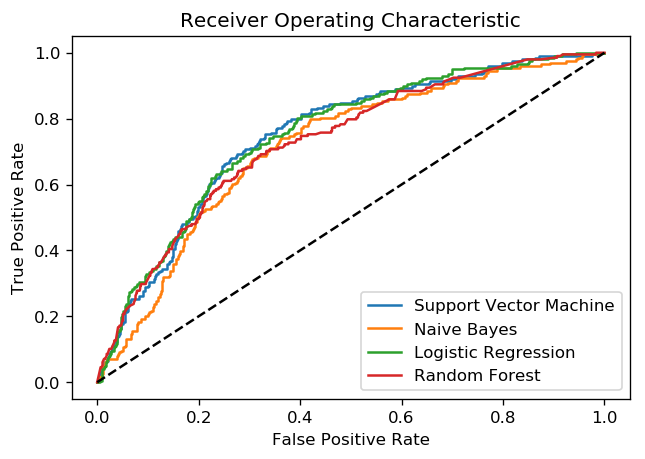

In [116]:
# Plot multiple ROC curves
plt.figure(dpi=120)
for i in range(len(all_roc_curve)):
    fpr = all_roc_curve[i][0]
    tpr = all_roc_curve[i][1]
    plt.plot(fpr, tpr, label=model_name[i])

plt.plot([0, 1], [0, 1],'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend()
plt.show()   

In [117]:
%%time
# Compute the probability 
linearSVC_proba = get_proba(linearSVC_best, trainData, testData, dataCol)
nonlinearSVC_proba = get_proba(nonlinearSVC_best, trainData, testData, dataCol)
gaussianNB_proba = get_proba(gaussianNB_best, trainData, testData, dataCol)
complementNB_proba = get_proba(complementNB_best, trainData, testData, dataCol)
lasso_proba = get_proba(lasso_best, trainData, testData, dataCol)
ridge_proba = get_proba(ridge_best, trainData, testData, dataCol)
elasticnet_proba = get_proba(elasticnet_best, trainData, testData, dataCol)
rf_proba = get_proba(rf_best, trainData, testData, dataCol)

Wall time: 11min 30s


In [141]:
# Collect predicted probability from all models
all_proba = [linearSVC_proba, gaussianNB_proba, elasticnet_proba, rf_proba]
model_name = ['Support Vector Machine', 'Naive Bayes', 'Logistic Regression', 'Random Forest']

In [167]:
# Calculate threshold adjustment
thres_adjustment = pd.DataFrame({})
thres_adjustment['threshold'] = [0.2, 0.4, 0.6, 0.8]
for i in range(len(all_proba)):
    thres_adjustment[model_name[i]] = [sum(all_proba[i][-1] > x) for x in thres_adjustment['threshold']]
thres_adjustment['Actual']  = testData['TARGET'].sum()

In [168]:
thres_adjustment

,threshold,Support Vector Machine,Naive Bayes,Logistic Regression,Random Forest,Actual
0,0.2,351,1123,1527,1512,198
1,0.4,39,1083,1023,711,198
2,0.6,0,1053,160,412,198
3,0.8,0,1007,0,10,198


## Lift Chart

In [55]:
%%time
# Compute Lift Chart
plot_lift_chart(linearSVC_best, trainData, testData, dataCol)

Wall time: 4min 41s


,Quantile,Amount,Lower Bound,Upper Bound,Predicted #,Actual #
0,1,154,0.015,0.039,4.7,2
1,2,153,0.039,0.057,7.3,6
2,3,154,0.057,0.067,9.5,9
3,4,153,0.067,0.082,11.4,6
4,5,154,0.082,0.107,14.4,9
5,6,153,0.107,0.138,18.6,16
6,7,153,0.138,0.171,23.6,20
7,8,154,0.171,0.217,29.5,39
8,9,153,0.217,0.287,38.5,41
9,10,154,0.289,1.000,56.4,50


## Logistic Regression Summary

In [118]:
# Compute Regression Summary for the best model
elasticnet_summary = reg_summary(elasticnet_best, dataCol)
elasticnet_summary['abs(coefficient)'] = np.absolute(elasticnet_summary['coefficient'])

In [119]:
elasticnet_summary.sort_values('abs(coefficient)', ascending=False).drop(columns='abs(coefficient)').head(10)

,variable,coefficient
2,REPORT_LAG,0.414740
1,CLAIMANT_AGE,-0.371836
0,intercept,-0.287520
468,fractur,0.196792
1025,tenant,0.176965
703,nan,-0.157180
49,CLAIMANT_GENDER_U,-0.152667
561,injuri,0.138137
620,letter,0.135692
475,ga,0.121195


In [121]:
# Look at Lasso Summary
lasso_summary = reg_summary(lasso_best, dataCol)
lasso_summary['abs(coefficient)'] = np.absolute(lasso_summary['coefficient'])

In [122]:
lasso_summary.sort_values('abs(coefficient)', ascending=False).drop(columns='abs(coefficient)').head(10)

,variable,coefficient
513,hazard,2.849518
41,CAUSE_OF_LOSS_Wrongful Termination,-1.657041
8,CAUSE_OF_LOSS_ADA,-1.408325
496,guest,-1.252952
654,make,-1.162219
245,citi,1.066930
499,habit,-1.028287
204,cake,1.020555
470,fresno,0.988283
166,blow,0.882864


In [106]:
# Find out significant vairables after lasso filtering
(lasso_summary['coefficient']!=0).sum()

229

# Variable Importance

In [123]:
# Compute variable importance
var_imp_result = var_imp(rf_best, trainData, testData, dataCol)
var_imp_result['abs(varImp)'] = np.absolute(var_imp_result['varImp'])

In [124]:
var_imp_result.sort_values('abs(varImp)', ascending=False).drop(columns='abs(varImp)').head(10)

,var,varImp
0,CLAIMANT_AGE,0.333991
2,UNIT_CREATION_LAG,0.107947
1,REPORT_LAG,0.101365
467,fractur,0.070900
498,habit,0.060669
88,agent,0.020445
244,citi,0.018997
573,involv,0.015844
469,fresno,0.015444
48,CLAIMANT_GENDER_U,0.014618


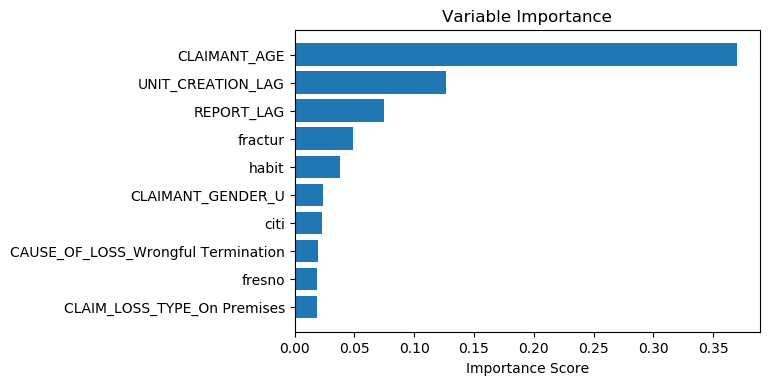

In [101]:
# Plot Variable Importance
var_imp_plot(var_imp_result)